In [2]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMClassifier
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score,f1_score
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

In [3]:
#csv导入数据,转为dataframe
train=pd.read_excel("C:\\Users\\dell\\Desktop\\ML\\train.xlsx" )
test=pd.read_excel("C:\\Users\\dell\\Desktop\\ML\\test.xlsx")

In [4]:
#手动划分训练集和验证集
X_train=train.drop('Shell', axis=1)
X_test=test.drop('Shell',axis=1)
y_train=train.Shell
y_test=test.Shell

In [5]:
model = LGBMClassifier(
 learning_rate=0.02,
 reg_alpha= 0.01,
 reg_lambda = 0.01,
 n_estimators=100,      #boosting迭代的次数
 max_depth= 10,         
 num_leaves= 40,
 n_estimators=30,
 subsample =0.8,            #
 subsample_freq=5,          #
 min_child_weight=0.01,    #叶子节点的最小权重和，调大可以防止过拟合
 min_child_samples=18     #叶子节点中最小的数据量，调大可以防止过拟合
    
)
model.fit(X_train, y_train)

#模型预测及评估
y_pred = model.predict(X_test)
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

In [7]:
print('模型预测准确度：{}'.format(model.score(X_test, y_test)))

模型预测准确度：0.84


In [8]:
# 计算特征重要性
features = X_train.columns
importances = model.feature_importances_
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
0,x1,113
3,x4,46
1,x2,41
4,x5,30
2,x3,0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

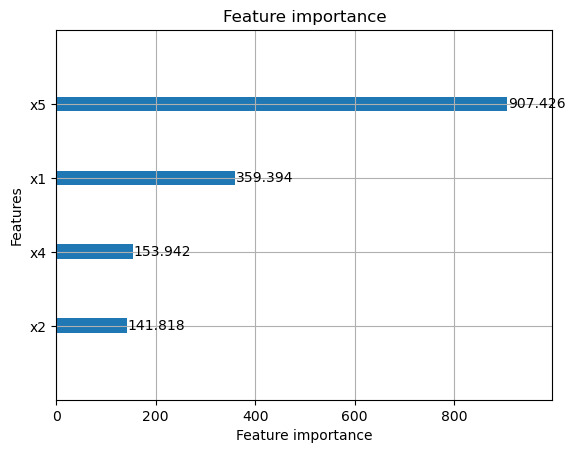

In [10]:
#绘制特征值重要性图
lgb.plot_importance(model,importance_type = "gain")

In [11]:
# 使用 GridSearch网格搜素：
parameters = {'n_estimators': [10, 20, 30],
             "learning_rate" : [0.005,0.01,0.02],
             "num_leaves": [40,64,128,256,512,1024,2048,4096],   
             "reg_alpha": [0.001, 0.02],
             "reg_lambda ": [0.001, 0.02],
             
             }
model = LGBMClassifier()
grid_search = GridSearchCV(model, parameters, scoring='recall', cv=3)

In [12]:
# 传入数据
grid_search.fit(X_train, y_train)
# 输出参数的最优值
grid_search.best_params_, grid_search.best_score_

[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.001
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.001
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.001
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.02
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.02
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.02
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[Light

({'learning_rate': 0.005,
  'n_estimators': 10,
  'num_leaves': 40,
  'reg_alpha': 0.001,
  'reg_lambda ': 0.001},
 0.773321449792038)